In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [3]:
data= pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape
# The dataset has 891 Records and 12 Columns

(891, 12)

<h1><u><b>Data Dictionary</u></b></h1>

PassengerId<br>
Survival<br>
P class (Ticket Class)<br>
Name<br>
Sex<br>
Age<br>
Sibsp (No of Siblings and Spouses)<br>
parch (No of Parents and Children)<br>
ticket<br>
fare<br>
Cabin<br>
Embarked


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The columnn 'Cabin' has a lot of null values() and therefore it is best to just drop the entire column as it's just a Cabin number

In [6]:
data.drop("Cabin",axis='columns',inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
print(data['Age'].unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [10]:
print(data['Age'].value_counts())

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


In [11]:
np.std(data['Age'])

14.516321150817316

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age', ylabel='Count'>

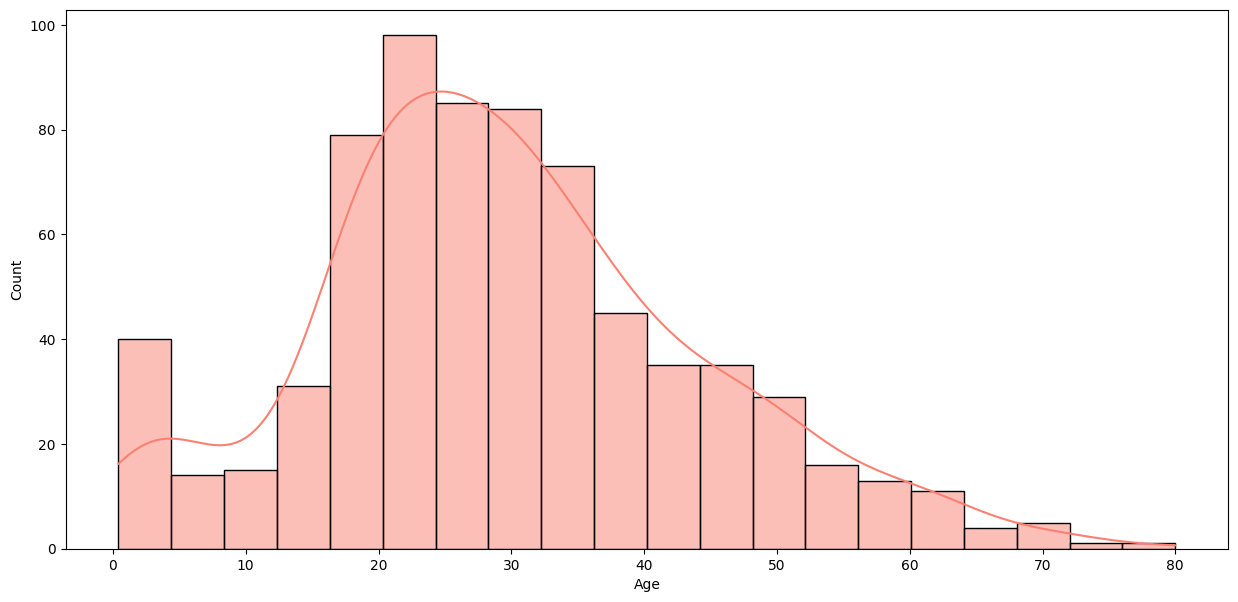

In [13]:
fig,axes=plt.subplots(1,1,figsize=(15,7))
sns.histplot(data['Age'],kde=True,ax=axes,color='salmon')

**Age** is Ranging from **0-80 years.**<br>
The **highest count** appears to be **around 20-25** indicating **most frequent age group.**<br>
Data is **Slightly skewed towards older ages**



In [14]:
print("Skewness",data['Age'].skew())
print("Kurtosis",data['Age'].kurtosis())

Skewness 0.38910778230082704
Kurtosis 0.17827415364210353


In [15]:
# prompt: I want to print only the age column without  null values

data['Age'].fillna(data['Age'].median(),inplace=True)

C:\Users\Sherwyn\AppData\Local\Temp\ipykernel_8864\1089344872.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)


In [16]:
data['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [17]:
data['Embarked'].mode()[0]

'S'

In [18]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

C:\Users\Sherwyn\AppData\Local\Temp\ipykernel_8864\1523684883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)


In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

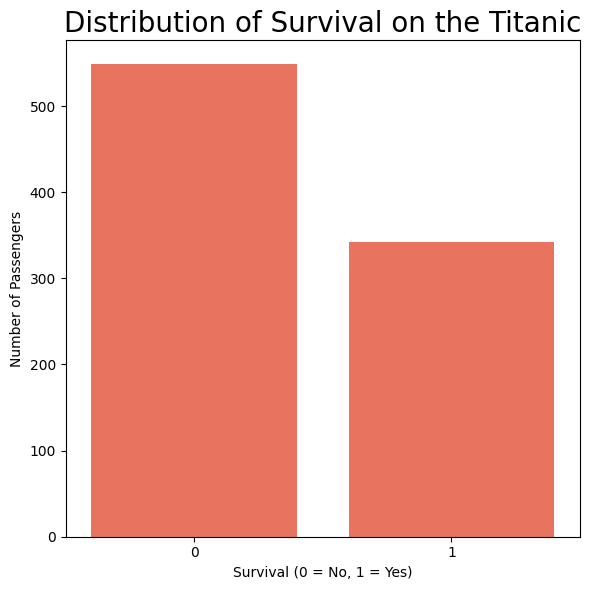

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x='Survived', data=data, ax=ax,color='tomato')
ax.set_title("Distribution of Survival on the Titanic", fontsize=20)
ax.set_xlabel("Survival (0 = No, 1 = Yes)")
ax.set_ylabel("Number of Passengers")

plt.tight_layout()
plt.show()


In [21]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

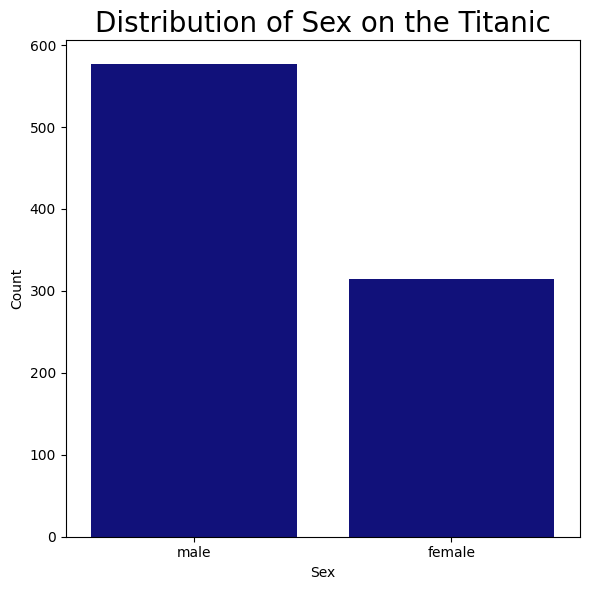

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x='Sex', data=data, ax=ax,color='darkblue')
ax.set_title("Distribution of Sex on the Titanic", fontsize=20)
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


In [23]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

C:\Users\Sherwyn\AppData\Local\Temp\ipykernel_8864\1791694800.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:darkgreen'` for the same effect.

  sns.countplot(x='Sex', hue='Survived', data=data, ax=ax,color='darkgreen')


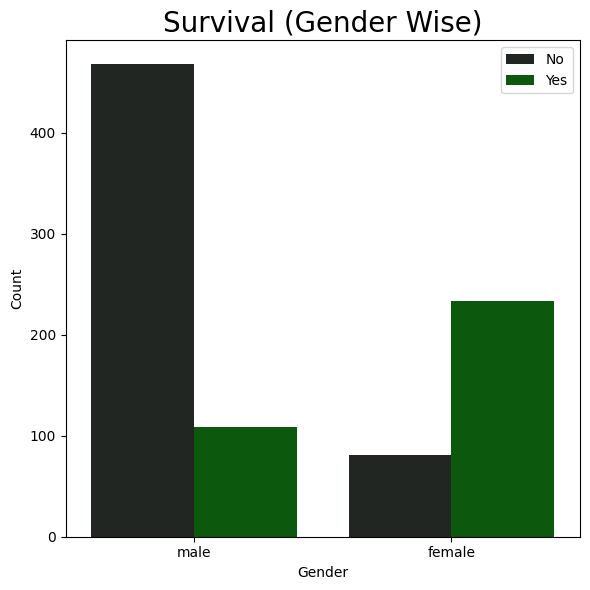

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax,color='darkgreen')
ax.set_title("Survival (Gender Wise)", fontsize=20)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.legend(["No", "Yes"])
plt.tight_layout()
plt.show()


In [25]:
data.replace({"Embarked":{"S":0,"C":1,"Q":2},"Sex":{"male":0,"female":1}},inplace=True)

C:\Users\Sherwyn\AppData\Local\Temp\ipykernel_8864\3718697437.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Embarked":{"S":0,"C":1,"Q":2},"Sex":{"male":0,"female":1}},inplace=True)


In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [27]:
data.drop(columns={"Name","Ticket"}, inplace=True)

<Axes: >

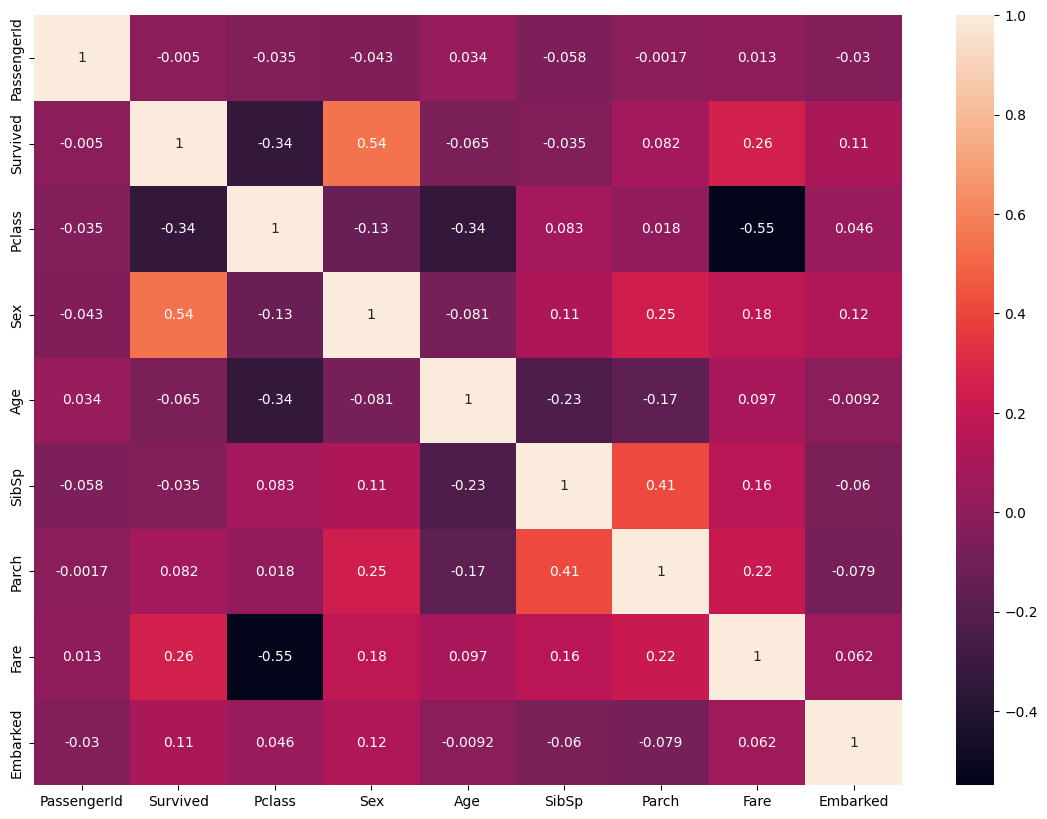

In [28]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True)

<h1><b><u>MODEL BUILDING</u></b></h1>

In [29]:
X = data.drop(columns=['Survived', 'PassengerId'])
y = data.loc[:, 'Survived']

In [30]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,28.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [31]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

logistic_reg_model = LogisticRegression(max_iter=156)
logistic_reg_model.fit(X_train, y_train)

logistic_results=logistic_reg_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, logistic_results))

Accuracy Score: 0.8212290502793296


In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)

random_forest_results=random_forest_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, random_forest_results))

Accuracy Score: 0.8379888268156425


In [35]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_results = xgb_model.predict(X_test)

# Evaluate the accuracy of the model
print("Accuracy Score:", accuracy_score(y_test, xgb_results))

Accuracy Score: 0.8603351955307262


In [36]:
test_df=pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [39]:
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)

C:\Users\Sherwyn\AppData\Local\Temp\ipykernel_8864\4089852231.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(),inplace=True)


In [40]:
test_df.drop("Cabin",axis='columns',inplace=True)

In [41]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [42]:
test_df.dropna(subset=['Fare'], inplace=True)

In [43]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [44]:
New_test_X=test_df.drop(columns={ 'PassengerId',"Name", "Ticket"})

In [45]:
New_test_X.replace({"Embarked":{"S":0,"C":1,"Q":2},"Sex":{"male":0,"female":1}},inplace=True)

C:\Users\Sherwyn\AppData\Local\Temp\ipykernel_8864\1054600317.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  New_test_X.replace({"Embarked":{"S":0,"C":1,"Q":2},"Sex":{"male":0,"female":1}},inplace=True)


In [46]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [47]:
xgb_results_test=xgb_model.predict(New_test_X)

In [48]:
xgb_model.predict_proba(New_test_X)

array([[9.86571193e-01, 1.34288035e-02],
       [9.90239501e-01, 9.76051949e-03],
       [9.98233378e-01, 1.76662533e-03],
       [5.07412434e-01, 4.92587537e-01],
       [5.23755014e-01, 4.76244986e-01],
       [9.52408850e-01, 4.75911684e-02],
       [9.87500608e-01, 1.24994135e-02],
       [9.16964829e-01, 8.30351487e-02],
       [1.70170069e-02, 9.82982993e-01],
       [9.99423265e-01, 5.76719234e-04],
       [9.02922869e-01, 9.70771238e-02],
       [9.41247642e-01, 5.87523319e-02],
       [4.47136164e-03, 9.95528638e-01],
       [9.94001210e-01, 5.99879446e-03],
       [3.36192846e-02, 9.66380715e-01],
       [3.86018157e-02, 9.61398184e-01],
       [9.93495762e-01, 6.50424836e-03],
       [4.23949242e-01, 5.76050758e-01],
       [1.93051577e-01, 8.06948423e-01],
       [8.84327948e-01, 1.15672030e-01],
       [8.75629902e-01, 1.24370083e-01],
       [7.47394562e-01, 2.52605408e-01],
       [1.74266100e-03, 9.98257339e-01],
       [8.77798200e-01, 1.22201830e-01],
       [7.998603

In [49]:
# xgb_model.save_model("xgboost_model.pkl")

In [50]:
print(X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
140       3    1  28.0      0      2  15.2458         1
439       2    0  31.0      0      0  10.5000         0
817       2    0  31.0      1      1  37.0042         1
378       3    0  20.0      0      0   4.0125         1
491       3    0  21.0      0      0   7.2500         0
..      ...  ...   ...    ...    ...      ...       ...
835       1    1  39.0      1      1  83.1583         1
192       3    1  19.0      1      0   7.8542         0
629       3    0  28.0      0      0   7.7333         2
559       3    1  36.0      1      0  17.4000         0
684       2    0  60.0      1      1  39.0000         0

[712 rows x 7 columns]


In [51]:
X1=data.drop(columns=['Survived', 'PassengerId','SibSp','Parch','Fare'])
y1=data.loc[:, 'Survived']

In [52]:
X1

,Pclass,Sex,Age,Embarked
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,0
3,1,1,35.0,0
4,3,0,35.0,0
...,...,...,...,...
886,2,0,27.0,0
887,1,1,19.0,0
888,3,1,28.0,0
889,1,0,26.0,1


In [53]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [54]:
xgb_model1 = xgb.XGBClassifier()
xgb_model1.fit(X_train1, y_train1)

# Predict on the test set
xgb_results1 = xgb_model1.predict(X_test1)

# Evaluate the accuracy of the model
print("Accuracy Score:", accuracy_score(y_test1, xgb_results1))

Accuracy Score: 0.8379888268156425


In [55]:
xgb_model1.save_model("xgboost_model.pkl")

c:\Users\Sherwyn\Downloads\titanic\titanic\venv\lib\site-packages\xgboost\core.py:160: UserWarning: [12:23:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [56]:
X_test1.columns

Index(['Pclass', 'Sex', 'Age', 'Embarked'], dtype='object')

In [57]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 495 to 372
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   Embarked  179 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 7.0 KB


In [58]:
xgb_results1 = xgb_model1.predict([[3,0,25.0,1]])[0]
xgb_results1

0